In [3]:
from google.colab import files
files.upload()

{}

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json #set permissions

In [5]:
# Create a new dir for traffic sign dataset
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [22]:
#Download the dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 597M/612M [00:07<00:00, 186MB/s]
100% 612M/612M [00:07<00:00, 84.4MB/s]


In [ ]:
!unzip /content/traffic_sign_dataset/gtsrb-german-traffic-sign.zip


In [8]:
!rm -r /content/traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -r /content/traffic_sign_dataset/traffic_sign_dataset/Meta
!rm -r /content/traffic_sign_dataset/traffic_sign_dataset/Test
!rm -r /content/traffic_sign_dataset/traffic_sign_dataset/meta
!rm -r /content/traffic_sign_dataset/traffic_sign_dataset/train

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D


In [ ]:
# Plotting 12 immages to check the dataset
plt.figure(figsize=(12,12))
path = '/content/traffic_sign_dataset/traffic_sign_dataset/test'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) #width of image
  plt.xlabel(rand_img.shape[0], fontsize = 10) # height of the image


In [6]:
# As the size of the images are different we need to equalize them so we will take mean of dimensions
dim1 = []
dim2 = []

for i in range(0,43):
  labels = '/content/traffic_sign_dataset/traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [7]:
# Printing mean dimensions of images
print("Dimensions 1 Mean : ", np.mean(dim1), " Dimension 2 Mean : ", np.mean(dim2))

Dimensions 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [8]:
# Now we will reshape the image to (50, 50)

images = []
label_id = []

for i in range(43):
  labels = '/content/traffic_sign_dataset/traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [9]:
# Converting images into numpy array
images = np.array(images)
# The pixel value of each image ranges between 0 and 255
# Dividing each each image by 255 will scale the values btw 0 and 1
# This is also known as normalisation
images = images/255
# Sorting the labelid's into a nupmy array
lable_id = np.array(label_id)
lable_id.shape

(39209,)

In [10]:
images.shape

(39209, 50, 50, 3)

In [11]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [12]:
# Splitting the data

x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state = 42)

#one-hot encoding
"""y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)"""
y_train = np.array(y_train)
y_val = np.array(y_val)

In [13]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0,5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0,5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [15]:
model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_data=(x_val, y_val), verbose = 2)

Epoch 1/50
246/246 - 16s - loss: 2.1405 - accuracy: 0.4217 - val_loss: 0.7277 - val_accuracy: 0.8350 - 16s/epoch - 65ms/step
Epoch 2/50
246/246 - 3s - loss: 0.8531 - accuracy: 0.7398 - val_loss: 0.2681 - val_accuracy: 0.9348 - 3s/epoch - 13ms/step
Epoch 3/50
246/246 - 3s - loss: 0.5603 - accuracy: 0.8244 - val_loss: 0.1780 - val_accuracy: 0.9537 - 3s/epoch - 13ms/step
Epoch 4/50
246/246 - 3s - loss: 0.4368 - accuracy: 0.8605 - val_loss: 0.1259 - val_accuracy: 0.9713 - 3s/epoch - 13ms/step
Epoch 5/50
246/246 - 4s - loss: 0.3549 - accuracy: 0.8862 - val_loss: 0.0953 - val_accuracy: 0.9790 - 4s/epoch - 14ms/step
Epoch 6/50
246/246 - 3s - loss: 0.3181 - accuracy: 0.8980 - val_loss: 0.0852 - val_accuracy: 0.9800 - 3s/epoch - 13ms/step
Epoch 7/50
246/246 - 3s - loss: 0.2805 - accuracy: 0.9094 - val_loss: 0.0736 - val_accuracy: 0.9825 - 3s/epoch - 13ms/step
Epoch 8/50
246/246 - 3s - loss: 0.2536 - accuracy: 0.9157 - val_loss: 0.0662 - val_accuracy: 0.9858 - 3s/epoch - 13ms/step
Epoch 9/50
246

<Axes: >

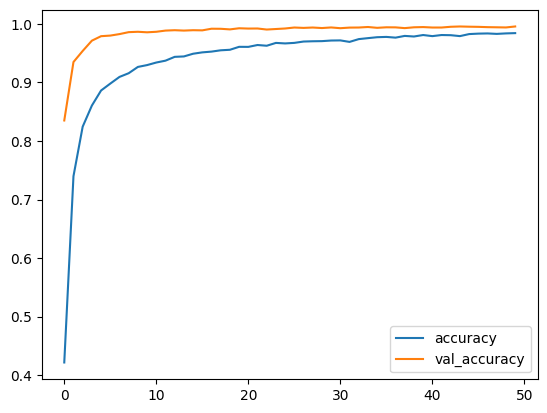

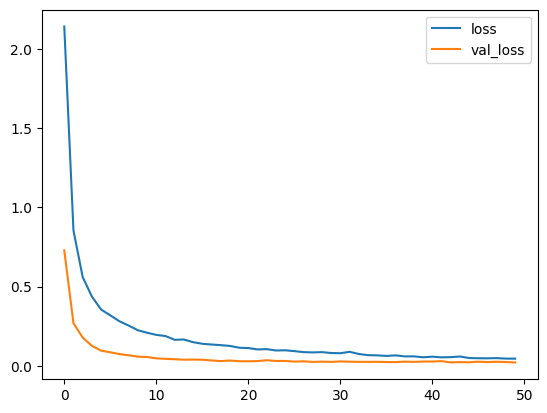

In [16]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [17]:
test_path = '/content/traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [20]:
# Defining function that will scale images

from PIL import Image

def scaling(test_images, test_path):
  images = []

  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

  #Converting images into numpy array
  images = np.array(images)

  # The pixel value of each image ranges between o and 155
  # Dividing each image by 255 will scale the values between 0 and 1. this is also known as normalization
  images = images/255

  return images


In [21]:
test_images = scaling(sorted(os.listdir(test_path)), test_path) # Calling the the function on test images

In [22]:
# read the label ids from Test.csv and store the values of the class id in y_test variable
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [27]:
y_pred_probs = model.predict(test_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_pred_classes

395/395 [==============================] - 1s 3ms/step


array([16,  1, 38, ...,  5,  7, 10])

In [30]:
# Storing all lables
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

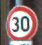

In [29]:
# Visualize the test image
img = Image.open(test_path + '/00001.png')
img

In [31]:
# Original Label

print("Original Label : ", all_labels[y_test[1]])

Original Label :  Speed limit (30km/h)


In [34]:
# Predicted label
print("Predicted Label : ", all_labels[y_pred_classes[1]])

Predicted Label :  Speed limit (30km/h)
